In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
import joblib

In [44]:
df = pd.read_csv("data/loan_data.csv")

# Exploration

In [45]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [47]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [48]:
object_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include = ['number'])

In [49]:
object_df

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [50]:
num_df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


<Axes: >

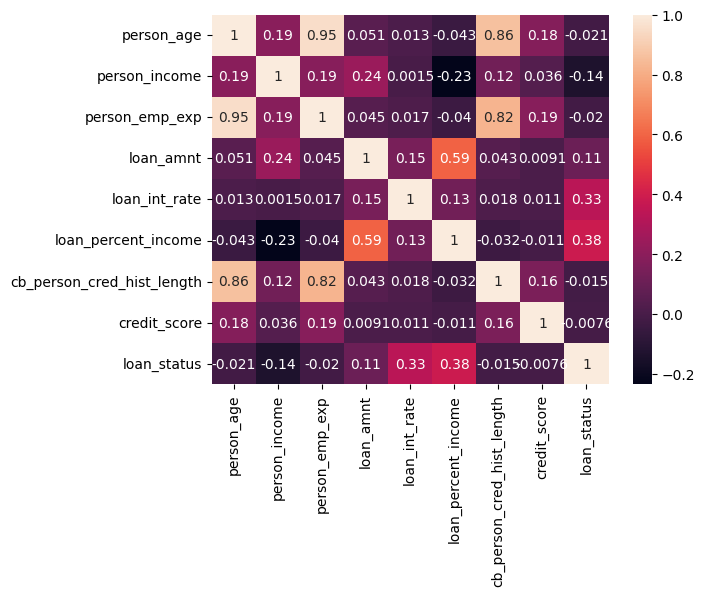

In [51]:
sns.heatmap(num_df.corr(), annot=True)

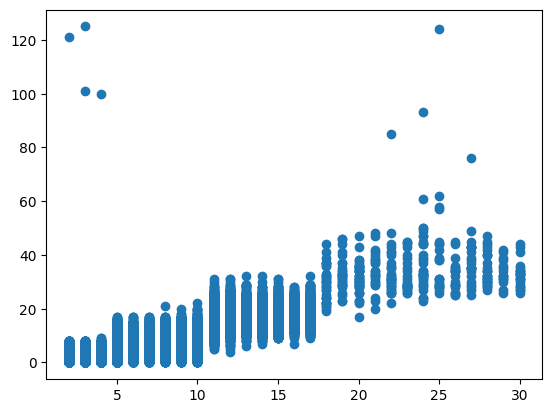

In [52]:
plt.scatter(num_df['cb_person_cred_hist_length'], df['person_emp_exp'])

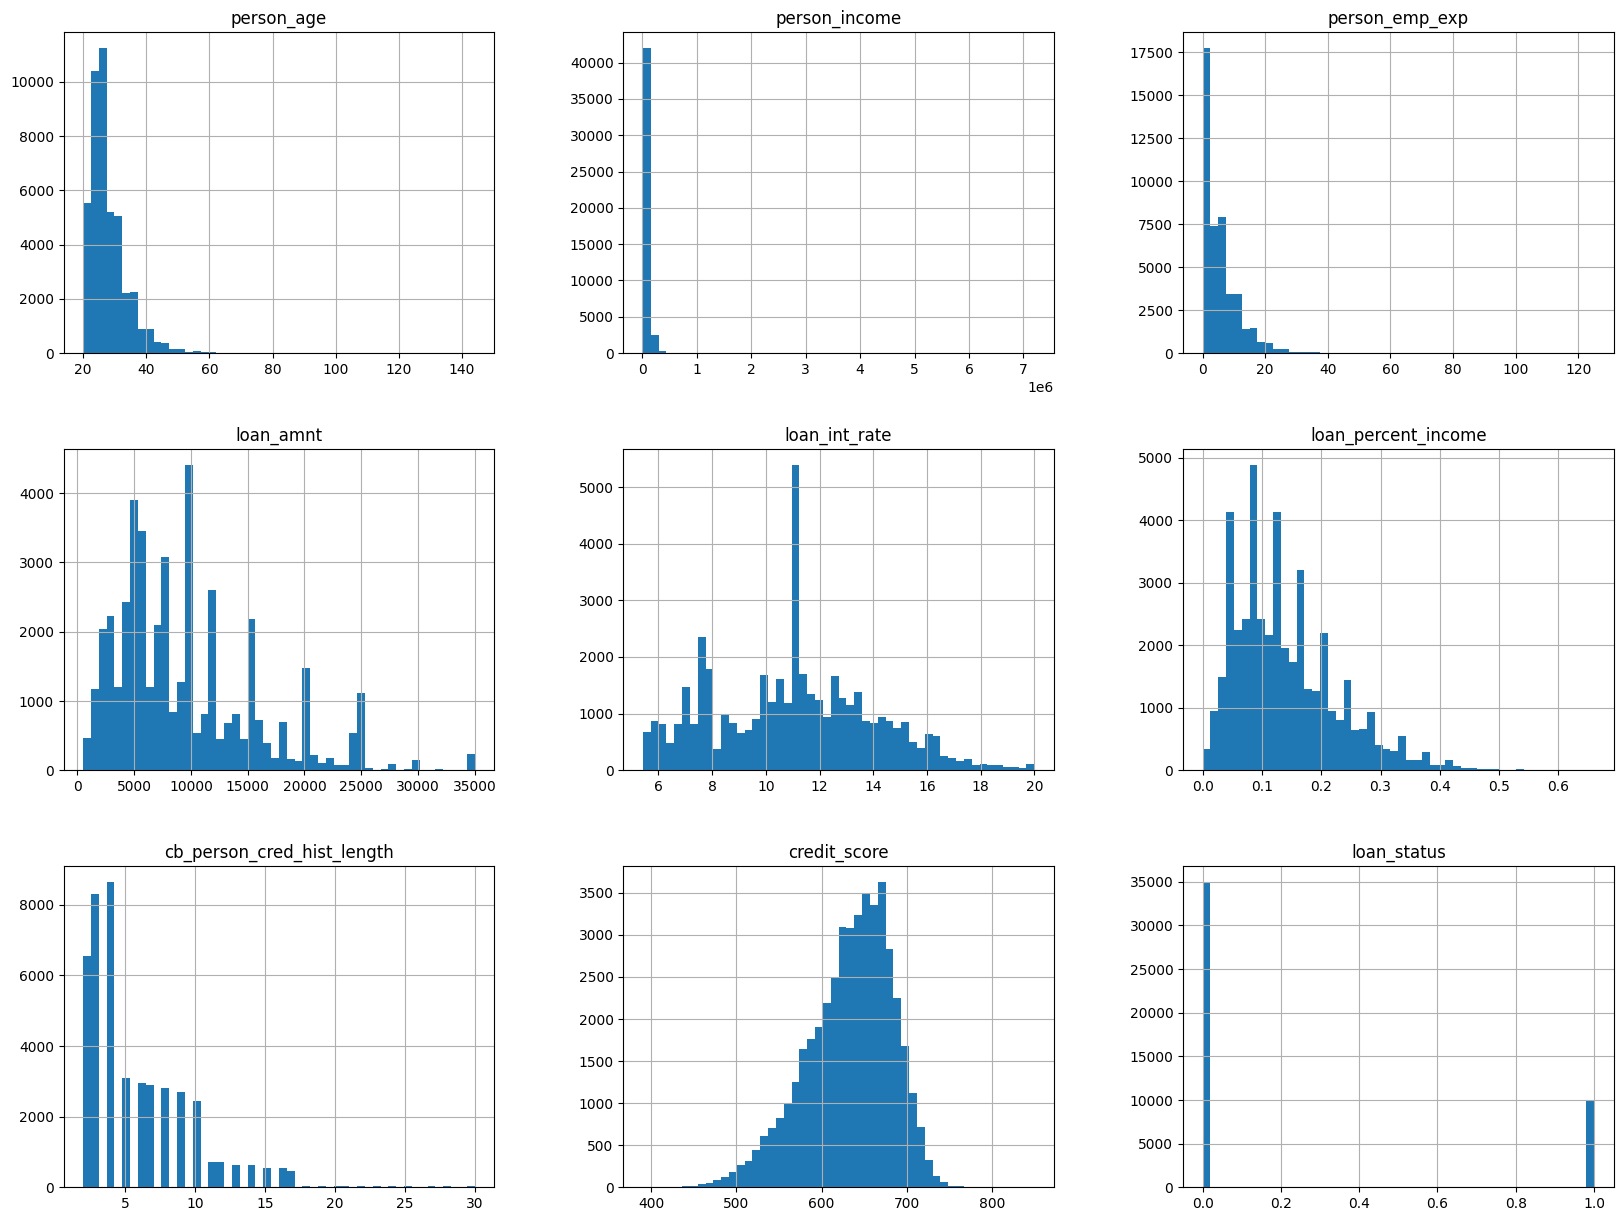

In [53]:
num_df.hist(bins=50, figsize=(20,15))
plt.show()

In [54]:
object_df.columns.values

array(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'], dtype=object)

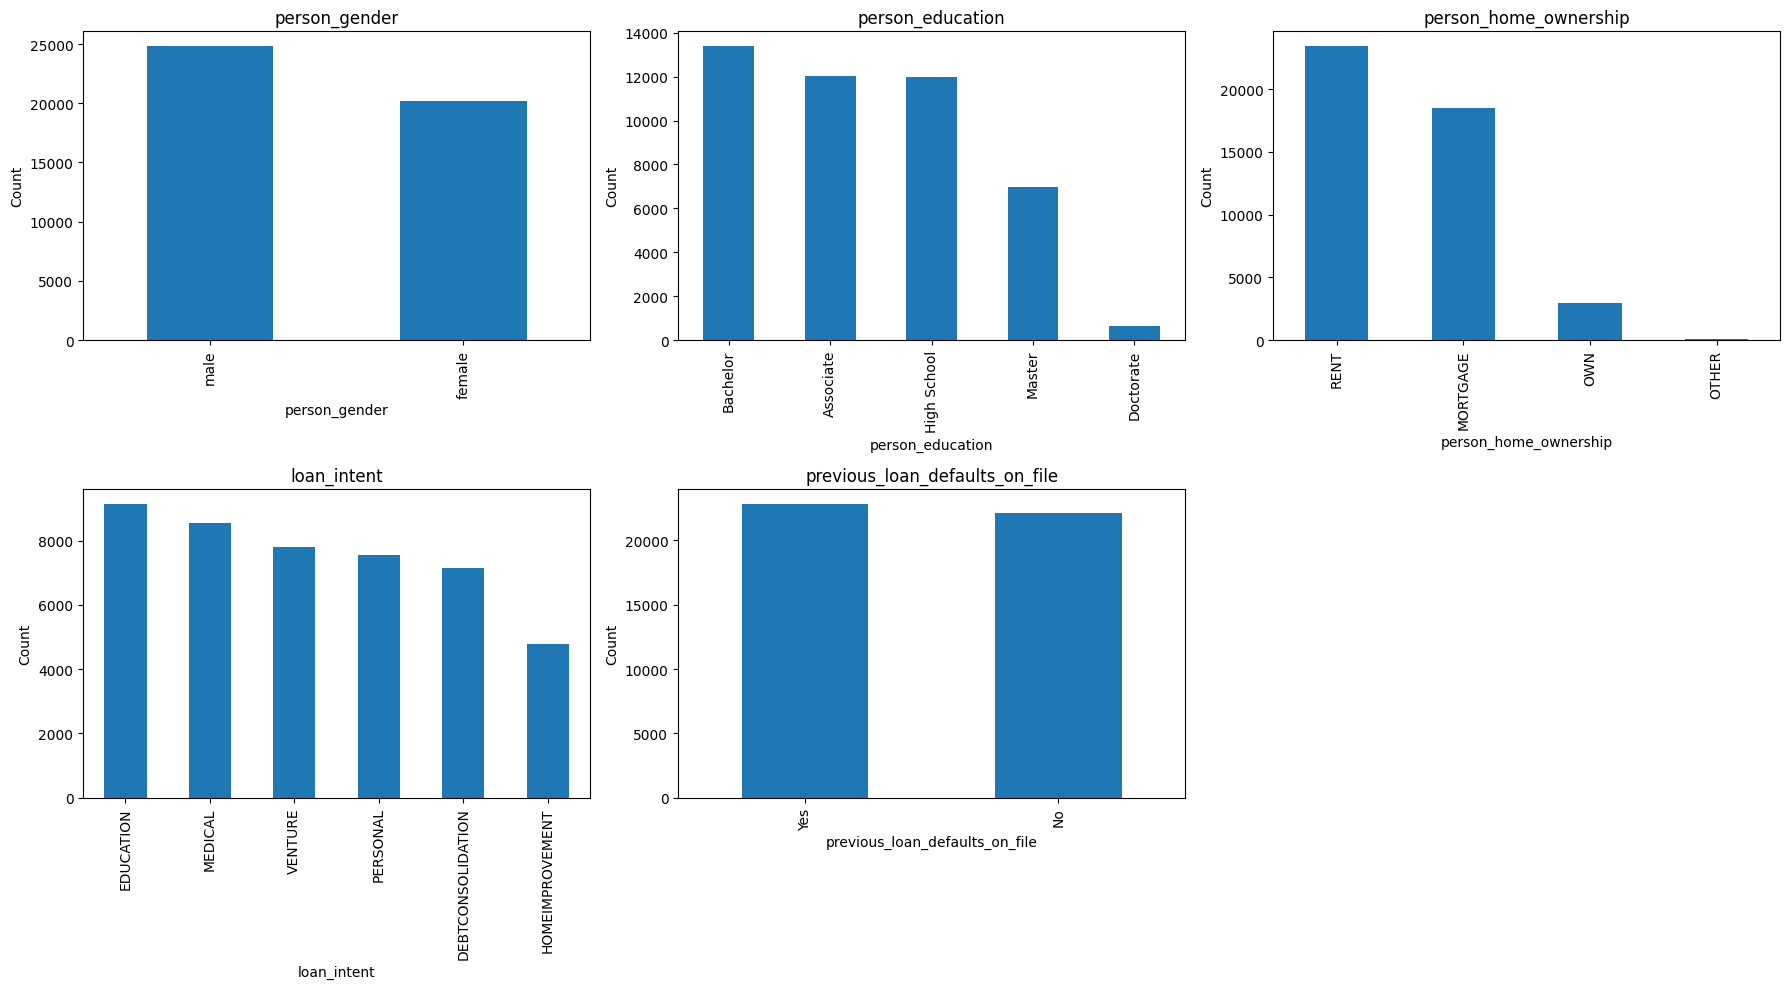

In [55]:
columns = object_df.columns.values

# Define the number of rows and columns for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Adjust layout as needed
axes = axes.flatten()  # Flatten in case of more than 1 row

# Loop through columns and plot bar charts
for i, col in enumerate(columns):
    object_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_ylabel("Count")

# Remove any empty subplot (if columns < subplot slots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# Preprocessing

In [56]:
df = df[df['person_home_ownership'] != "OTHER"]

In [57]:
df.shape

(44883, 14)

In [58]:
X = df.drop('loan_status', axis=1)
y = df['loan_status'].copy()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=df['loan_status'])

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35906, 13), (8977, 13), (35906,), (8977,))

In [ ]:
X_cat_df = X.select_dtypes(include=['object'])
X_num_df = X.select_dtypes(include = n 2 minutes for questions. Thanks!['number'])

In [62]:
def log_transform(x):
    return np.log1p(x)  # log(1 + x) to handle zero values safely

# Create the FunctionTransformer using the named function
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Define the ColumnTransformer with encoding and scaling
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(), X_cat_df.columns),  # One-hot encoding for categorical data
    ('log_scaler', Pipeline([
        ('log', log_transformer),   # Apply log transformation
        ('scaler', StandardScaler()) # Apply StandardScaler after log transform
    ]), X_num_df.columns)
])

In [63]:
ct.fit(X_train)

ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')),
                                ('log_scaler',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object'))])

In [64]:
transformed_X_train = ct.transform(X_train)
transformed_X_test = ct.transform(X_test)

# Building The Model

In [65]:
rf = RandomForestClassifier(random_state=42)

In [66]:
rf.fit(transformed_X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
def score_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    return {
        "acc": acc,
        "precision": precision,
        "recall": recall
    }

In [68]:
train_pred = rf.predict(transformed_X_train)
test_pred = rf.predict(transformed_X_test)

In [69]:
score_model(y_train, train_pred)

{'acc': 1.0, 'precision': 1.0, 'recall': 1.0}

In [70]:
score_model(y_test, test_pred)

{'acc': 0.928483903308455,
 'precision': 0.9081015719467956,
 'recall': 0.7540160642570282}

In [71]:
X_train.to_csv('loan_features.csv')

In [72]:
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# param_grid = {
#     'max_depth': [5, 10, 15, 20, None],  # None lets it grow fully
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 5, 10]
# }

# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(transformed_X_train, y_train)

# print("Best parameters:", grid_search.best_params_)


In [73]:
# rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_leaf=1, min_samples_split=2)

In [74]:
# rf.fit(transformed_X_train, y_train)

In [75]:
# train_pred = rf.predict(transformed_X_train)
# test_pred = rf.predict(transformed_X_test)

In [76]:
# score_model(y_train, train_pred)

In [77]:
# score_model(y_test, test_pred)

In [78]:
with open("model/model.joblib", 'wb') as f:
    joblib.dump(rf, f)

In [79]:
with open("model/scaler_encode.joblib", 'wb') as f:
    joblib.dump(ct, f)